<a href="https://colab.research.google.com/github/megadeazzahra/Machine-Learning/blob/main/Building%2C_Tuning%2C_dan_Deploying_Model_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Building, Tuning, dan Deploying Model Machine Learning
nama: Mega Deazzahra \
nim: 4112322016 \
prodi: Staterkom 2022

# Import Library

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt


# Memuat Data

Terlebih dahulu import library pandas. Library ini adalah alat yang sangat berguna dalam bahasa pemrograman Python untuk manipulasi dan analisis data, terutama data dalam format tabel.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Memeriksa data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/machine learning (sem 6)/loan_approval_dataset.csv')
df.head()

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,56,24000,PhD,333,26892,Personal,0
1,46,90588,Master,316,26619,Home,1
2,32,113610,PhD,452,1281,Personal,1
3,60,117856,High School,677,28420,Personal,0
4,25,58304,PhD,641,16360,Car,0


Selanjutnya, kita menggunakan pd.read_csv untuk membaca dataset yang berada dalam format CSV (Comma-Separated Values). Dataset ini disimpan dalam DataFrame bernama df, yang merupakan struktur data utama dalam pandas.

Dengan df.head(), kita dapat melihat 5 baris pertama dari DataFrame. untuk memberikan gambaran awal tentang struktur dan isi data yang akan kita olah.

#EDA

In [4]:
df.tail()

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
495,37,108236,High School,455,44668,Education,1
496,41,117579,Bachelor,666,24177,Car,1
497,29,26469,PhD,550,25022,Medical,0
498,52,50105,High School,633,41761,Medical,0
499,50,62101,Bachelor,810,6542,Home,1


In [5]:
df.shape

(500, 7)

Memeriksa Dimensi Data menggunakan df.shape, kita dapat mengetahui jumlah baris dan kolom dalam DataFrame.

In [6]:
df.dtypes

,0
Age,int64
Income,int64
Education_Level,object
Credit_Score,int64
Loan_Amount,int64
Loan_Purpose,object
Loan_Approval,int64


Memeriksa tipe data Dengan df.dtypes, kita dapat melihat tipe data dari setiap kolom dalam DataFrame. Memastikan bahwa setiap kolom memiliki tipe data yang sesuai

In [7]:
df.describe()

,Age,Income,Credit_Score,Loan_Amount,Loan_Approval
count,500.000000,500.00000,500.00000,500.000000,500.000000
mean,41.278000,67210.16800,572.37800,26526.744000,0.596000
std,13.389072,28908.77426,159.71466,13931.322188,0.491189
min,18.000000,20055.00000,301.00000,1125.000000,0.000000
25%,30.000000,42534.25000,432.00000,13327.500000,0.000000
50%,42.000000,64906.50000,584.00000,27985.500000,1.000000
75%,52.000000,93071.25000,698.50000,38381.000000,1.000000
max,64.000000,119835.00000,848.00000,49938.000000,1.000000


In [8]:
# cek banyaknya missing value pada masing-masing kolom
print(df.isnull().sum())

Age                0
Income             0
Education_Level    0
Credit_Score       0
Loan_Amount        0
Loan_Purpose       0
Loan_Approval      0
dtype: int64


## Visualisasi Data

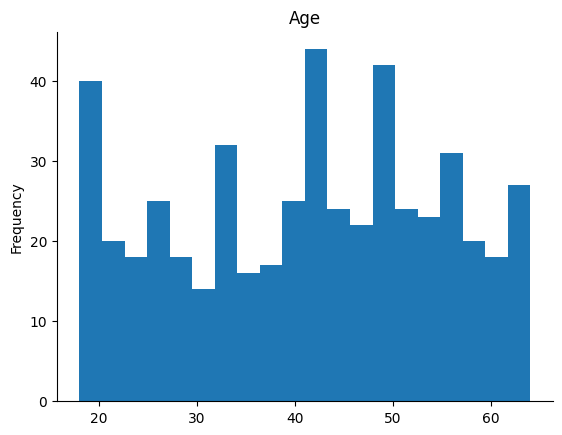

In [9]:
#Age
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

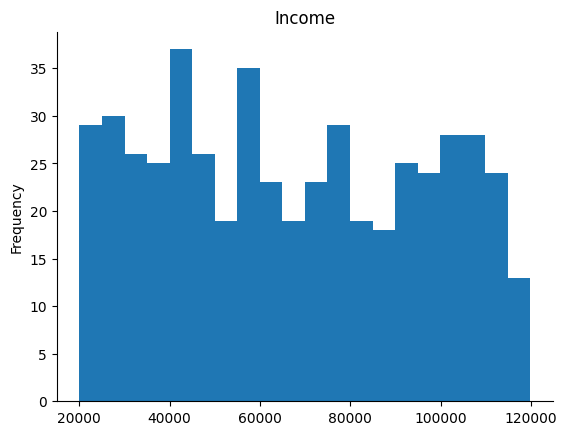

In [10]:
#Income
df['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

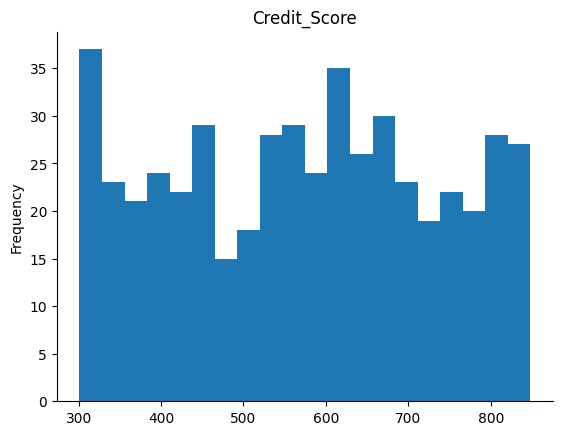

In [11]:
#Credit_Score
df['Credit_Score'].plot(kind='hist', bins=20, title='Credit_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

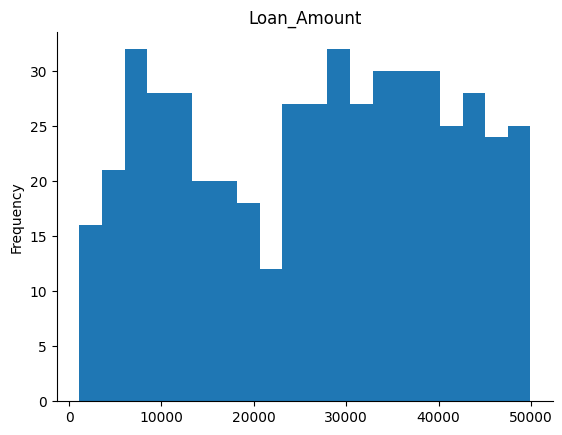

In [12]:
#Loan_Amount
df['Loan_Amount'].plot(kind='hist', bins=20, title='Loan_Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

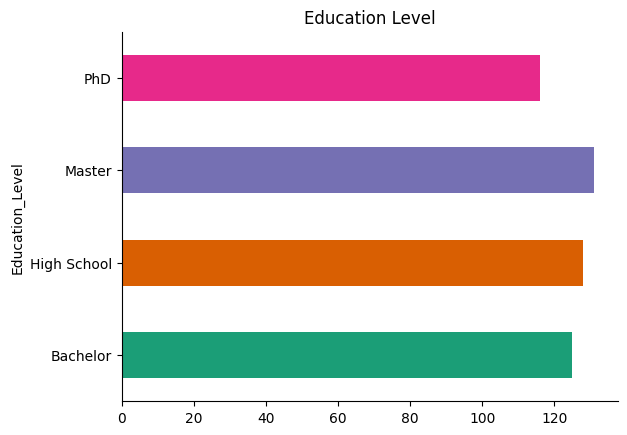

In [13]:
#Education_Level
df.groupby('Education_Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), title='Education Level')
plt.gca().spines[['top', 'right',]].set_visible(False)

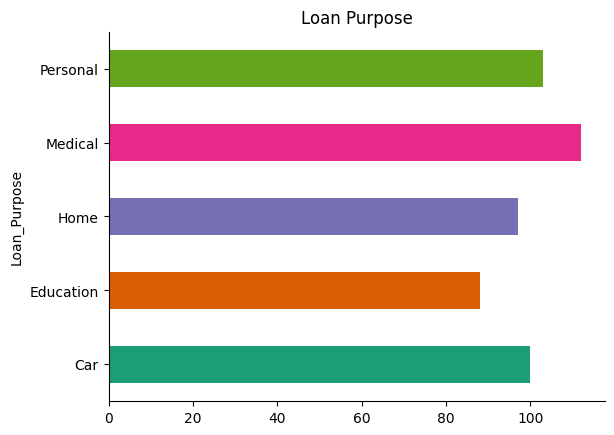

In [14]:
#Loan_Purpose
df.groupby('Loan_Purpose').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), title='Loan Purpose')
plt.gca().spines[['top', 'right',]].set_visible(False)

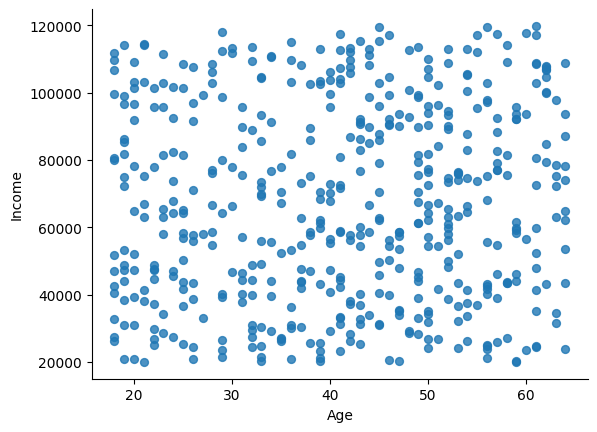

In [15]:
# Age vs Income
df.plot(kind='scatter', x='Age', y='Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

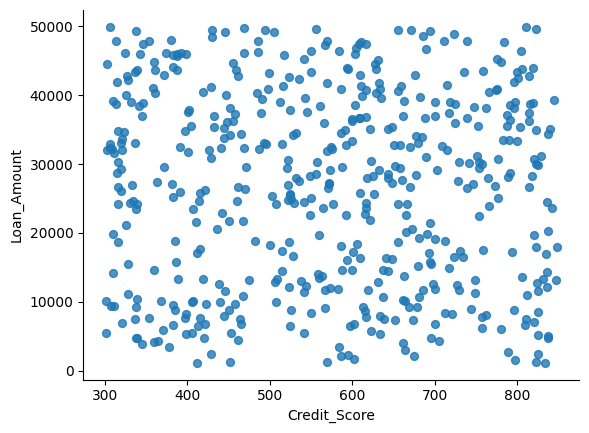

In [16]:
# Credit_Score vs Loan_Amount
df.plot(kind='scatter', x='Credit_Score', y='Loan_Amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

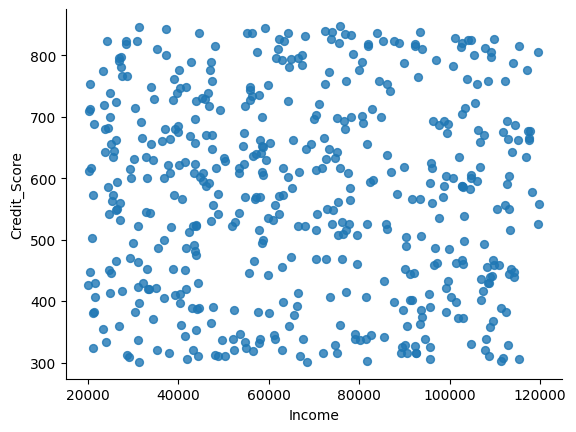

In [17]:
#Income vs Credit_Score

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Income', y='Credit_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

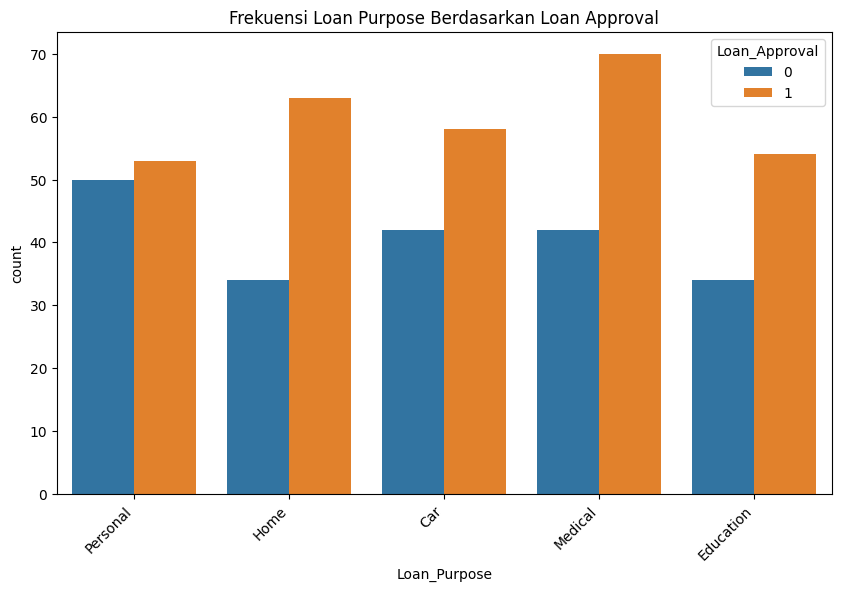

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Purpose', data=df, hue='Loan_Approval')
plt.title('Frekuensi Loan Purpose Berdasarkan Loan Approval')
plt.xticks(rotation=45, ha='right')
plt.show()


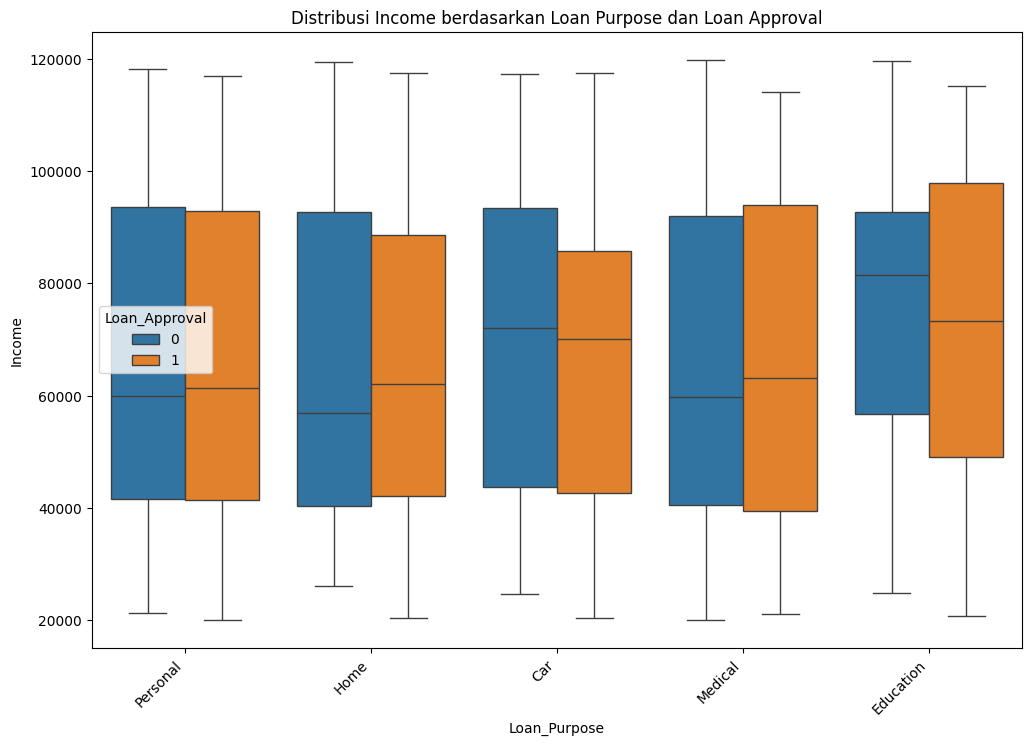

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Loan_Purpose', y='Income', data=df, hue='Loan_Approval')
plt.title('Distribusi Income berdasarkan Loan Purpose dan Loan Approval')
plt.xticks(rotation=45, ha='right')
plt.show()


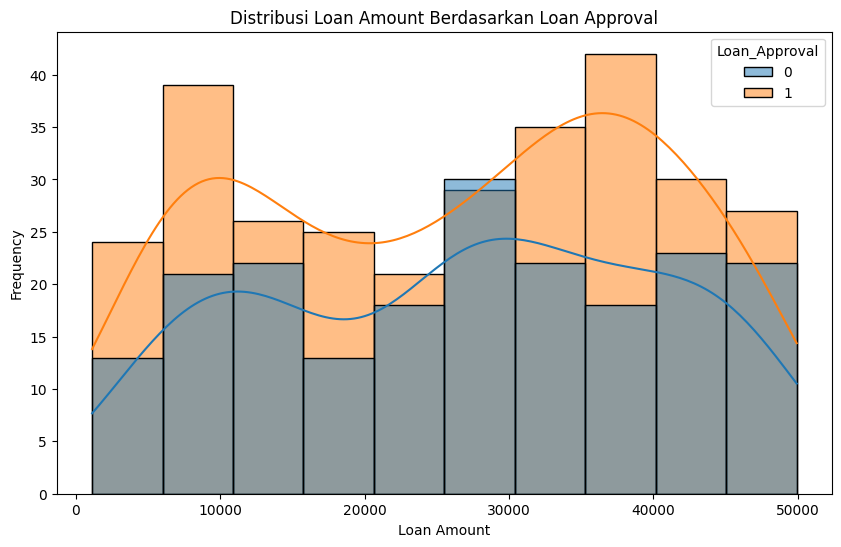

In [20]:
# Visualisasi distribusi 'Loan_Amount' berdasarkan Loan_Approval
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Loan_Amount', hue='Loan_Approval', kde=True)
plt.title('Distribusi Loan Amount Berdasarkan Loan Approval')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

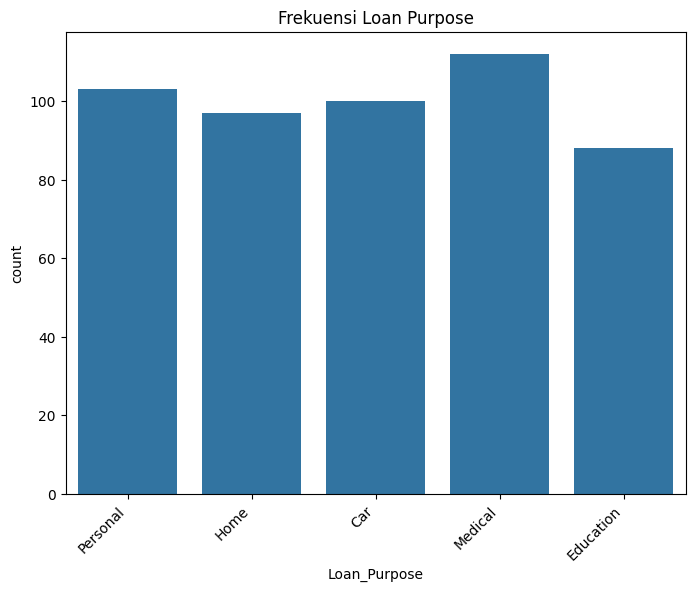

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Purpose', data=df)
plt.title('Frekuensi Loan Purpose')
plt.xticks(rotation=45, ha='right')
plt.show()

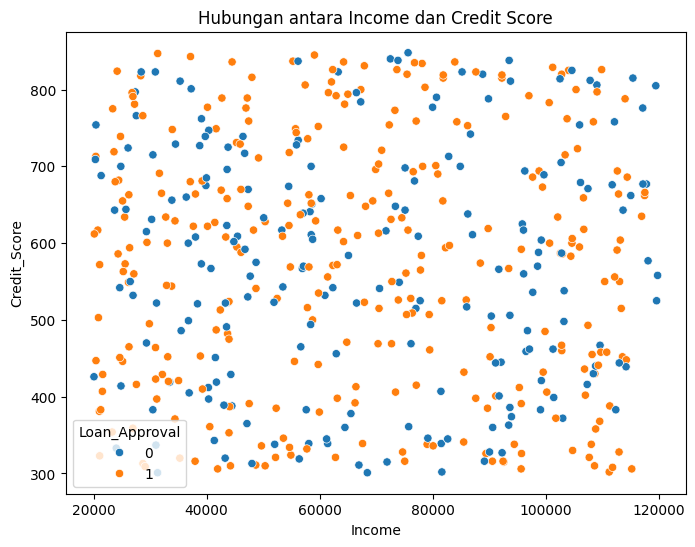

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Credit_Score', data=df, hue='Loan_Approval')
plt.title('Hubungan antara Income dan Credit Score')
plt.show()

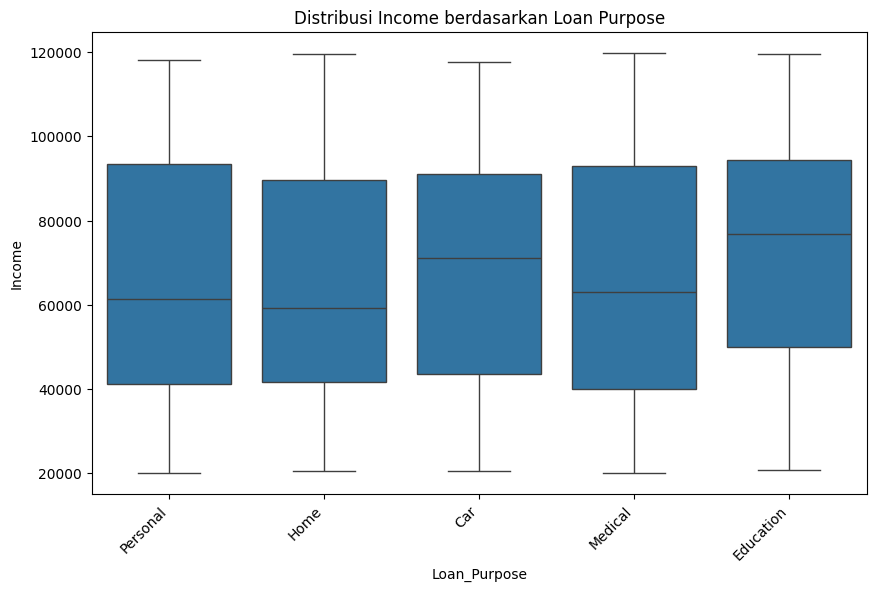

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Purpose', y='Income', data=df)
plt.title('Distribusi Income berdasarkan Loan Purpose')
plt.xticks(rotation=45, ha='right')
plt.show()

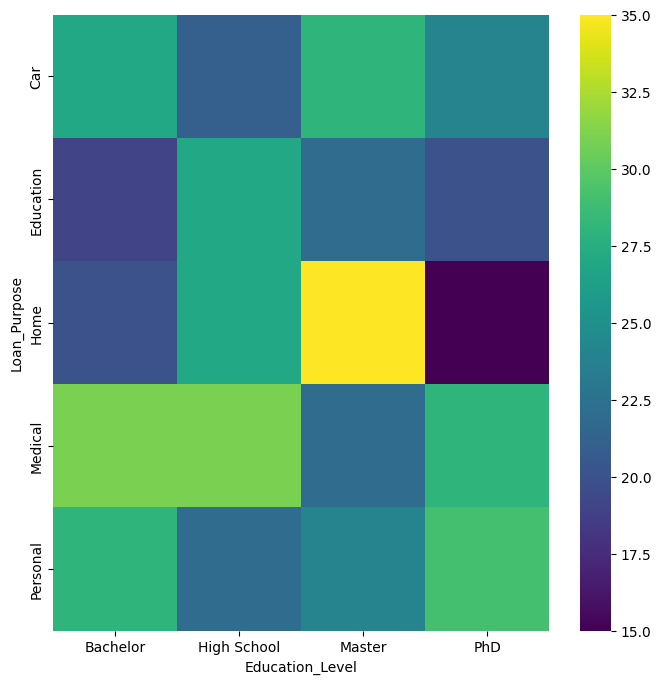

In [24]:
#Education_Level vs Loan_Purpose

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Loan_Purpose'].value_counts()
    for x_label, grp in df.groupby('Education_Level')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Education_Level')
_ = plt.ylabel('Loan_Purpose')

# Prapemrosesan Data

In [25]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != 'O' and
                   dataframe[col].nunique() < cat_th]
    cat_but_car= [col for col in dataframe.columns if dataframe[col].dtypes=='O' and
              dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes!='O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observation: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"Categorical Columns: {len(cat_cols)}")
    print(f"Numerical Columns: {len(num_cols)}")
    print(f"Categorical But Cardinal: {len(cat_but_car)}")
    print(f"Numerical But Categorical: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car  =grab_col_names(df)

Observation: 500
Variables: 7
Categorical Columns: 3
Numerical Columns: 4
Categorical But Cardinal: 0
Numerical But Categorical: 1


## Analisis Variabelnya

### Categorical Columns

In [26]:
def target_with_cat(dataframe, cat_col, target):
    print(pd.DataFrame({'Target Mean:':dataframe.groupby(cat_col)[target].mean(),
                        'Count': dataframe[cat_col].value_counts(),
                        'Ratio':dataframe[cat_col].value_counts() / len(dataframe)*100}))
    print()

for col in cat_cols:
    target_with_cat(df, col, 'Loan_Approval')

                 Target Mean:  Count  Ratio
Education_Level                            
Bachelor             0.560000    125   25.0
High School          0.625000    128   25.6
Master               0.603053    131   26.2
PhD                  0.594828    116   23.2

              Target Mean:  Count  Ratio
Loan_Purpose                            
Car               0.580000    100   20.0
Education         0.613636     88   17.6
Home              0.649485     97   19.4
Medical           0.625000    112   22.4
Personal          0.514563    103   20.6

               Target Mean:  Count  Ratio
Loan_Approval                            
0                       0.0    202   40.4
1                       1.0    298   59.6



Output tersebut merupakan hasil dari analisis data yang menunjukkan hubungan antara variabel target (dalam hal ini, 'Loan_Approval' atau persetujuan pinjaman) dengan beberapa variabel kategorikal lainnya seperti 'Education_Level' dan 'Loan_Purpose'.

### Numerical Columns

In [27]:
def target_with_num(dataframe, num_col, target):
    print(num_col.capitalize())
    print(dataframe.groupby(target)[num_col].mean(), end='\n\n')

for col in num_cols:
    target_with_num(df, col, 'Loan_Approval')

Age
Loan_Approval
0    41.960396
1    40.815436
Name: Age, dtype: float64

Income
Loan_Approval
0    67806.004950
1    66806.278523
Name: Income, dtype: float64

Credit_score
Loan_Approval
0    571.084158
1    573.255034
Name: Credit_Score, dtype: float64

Loan_amount
Loan_Approval
0    26876.985149
1    26289.332215
Name: Loan_Amount, dtype: float64



output ini adalah hasil analisis hubungan antara variabel target (dalam hal ini, 'Loan_Approval') dengan variabel numerik

## Outliers Problem

#### Check Outliers

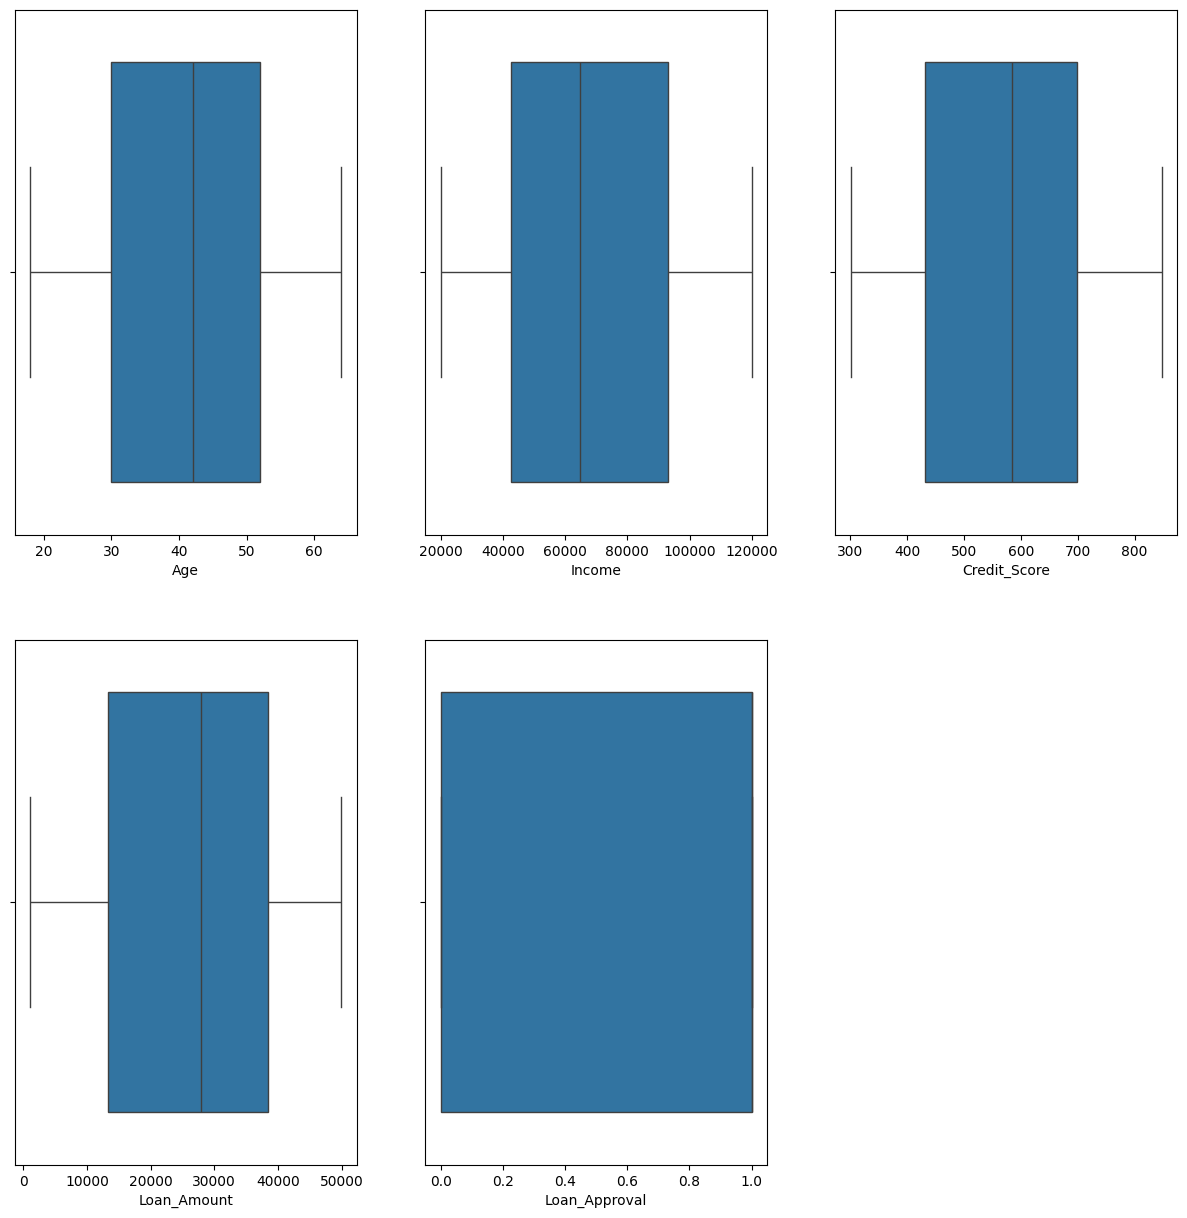

In [28]:
# Bocplot numerical columns
plt.figure(figsize=(15,15))
numerical = df.select_dtypes(exclude=['object']).columns
num_rows = int(np.ceil(len(numerical) / 3))
for i, col in zip(range(1, len(numerical) + 1), df[numerical]):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(data=df, x=df[col])
plt.show()

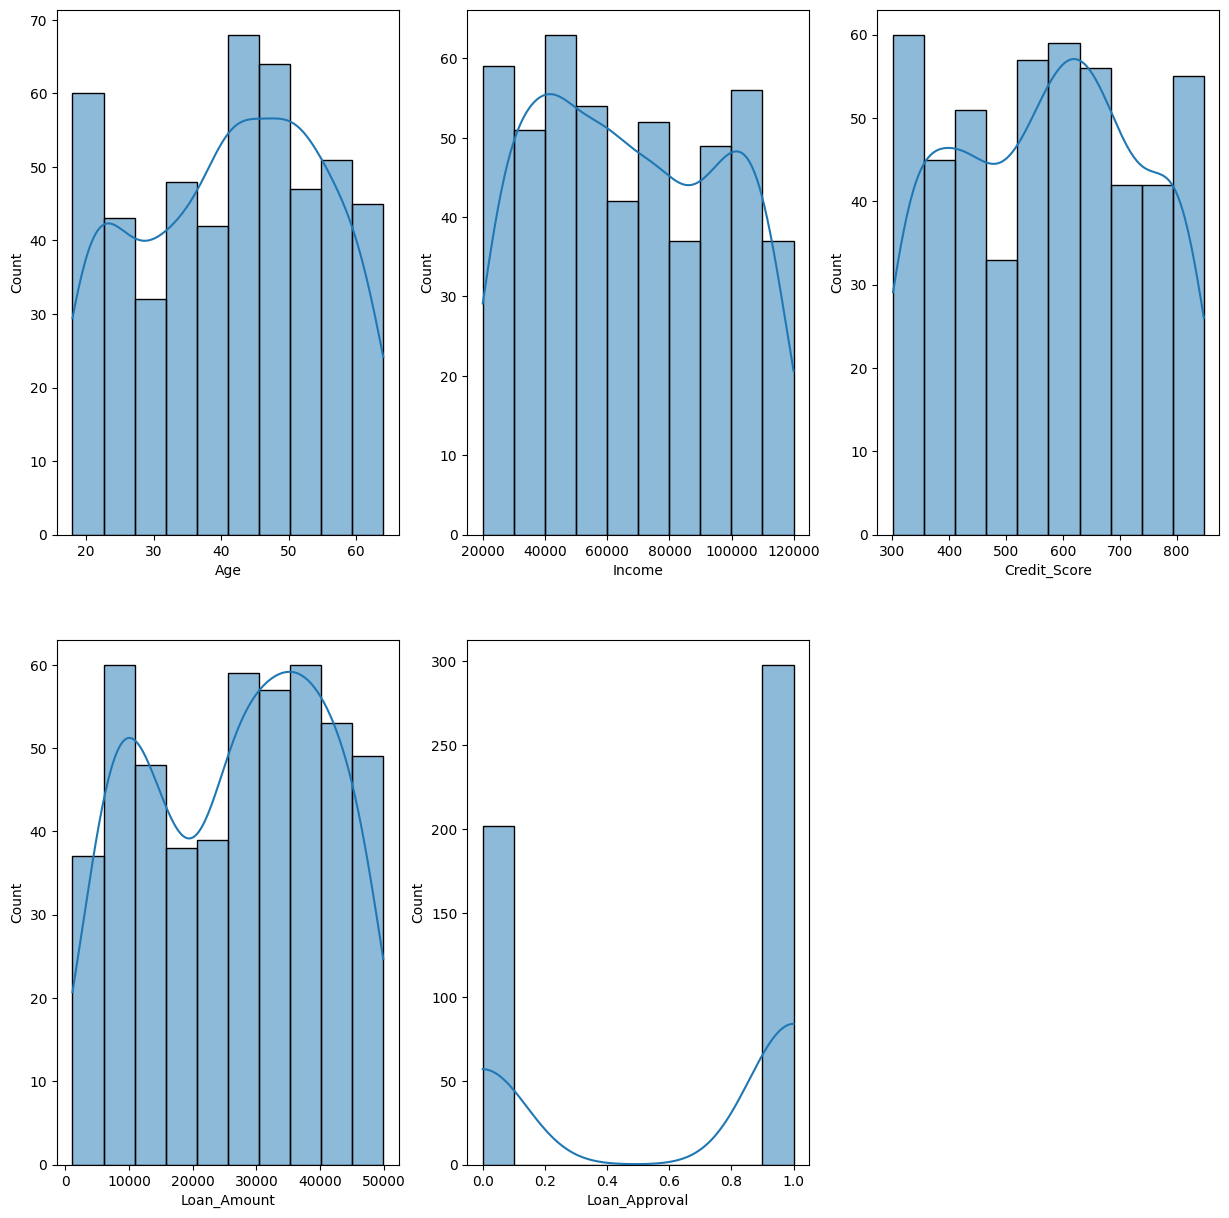

In [29]:
# Bocplot numerical columns
plt.figure(figsize=(15,15))
num_rows = int(np.ceil(len(numerical) / 3))
for i, col in zip(range(1, len(numerical) + 1), df[numerical]):
    plt.subplot(num_rows, 3, i)
    sns.histplot(data=df, x=df[col], kde=True)
plt.show()

In [30]:
def detect_outliers(df, numerical_cols, lower_factor=1.5, upper_factor=1.5):
    outlier_data = pd.DataFrame()
    all_outliers_idx = set()

    numerical_cols = [col for col in numerical_cols if pd.api.types.is_numeric_dtype(df[col])]

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - lower_factor * IQR
        upper_bound = Q3 + upper_factor * IQR

        if not df.empty:
            print(f"{col}: Min Value = {df[col].min()}, Max Value = {df[col].max()}")
            print(f"{col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}\n")

        outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
        all_outliers_idx.update(outliers.index)

    outlier_data = df.loc[list(all_outliers_idx)]
    df_cleaned = df.drop(index=all_outliers_idx)

    if len(outlier_data) > 0:
        print("Outliers detected and stored in 'outlier_data'. Remaining data cleaned.")
    else:
        print("No outliers detected. Data remains unchanged.")

    return df_cleaned, outlier_data

In [31]:
# Apply function
dfCleaned, outlierData = detect_outliers(df, numerical , 1.5 , 1.5)

Age: Min Value = 18, Max Value = 64
Age: Lower Bound = -3.0, Upper Bound = 85.0

Income: Min Value = 20055, Max Value = 119835
Income: Lower Bound = -33271.25, Upper Bound = 168876.75

Credit_Score: Min Value = 301, Max Value = 848
Credit_Score: Lower Bound = 32.25, Upper Bound = 1098.25

Loan_Amount: Min Value = 1125, Max Value = 49938
Loan_Amount: Lower Bound = -24252.75, Upper Bound = 75961.25

Loan_Approval: Min Value = 0, Max Value = 1
Loan_Approval: Lower Bound = -1.5, Upper Bound = 2.5

No outliers detected. Data remains unchanged.


Tidak ada outlier dalam data ini

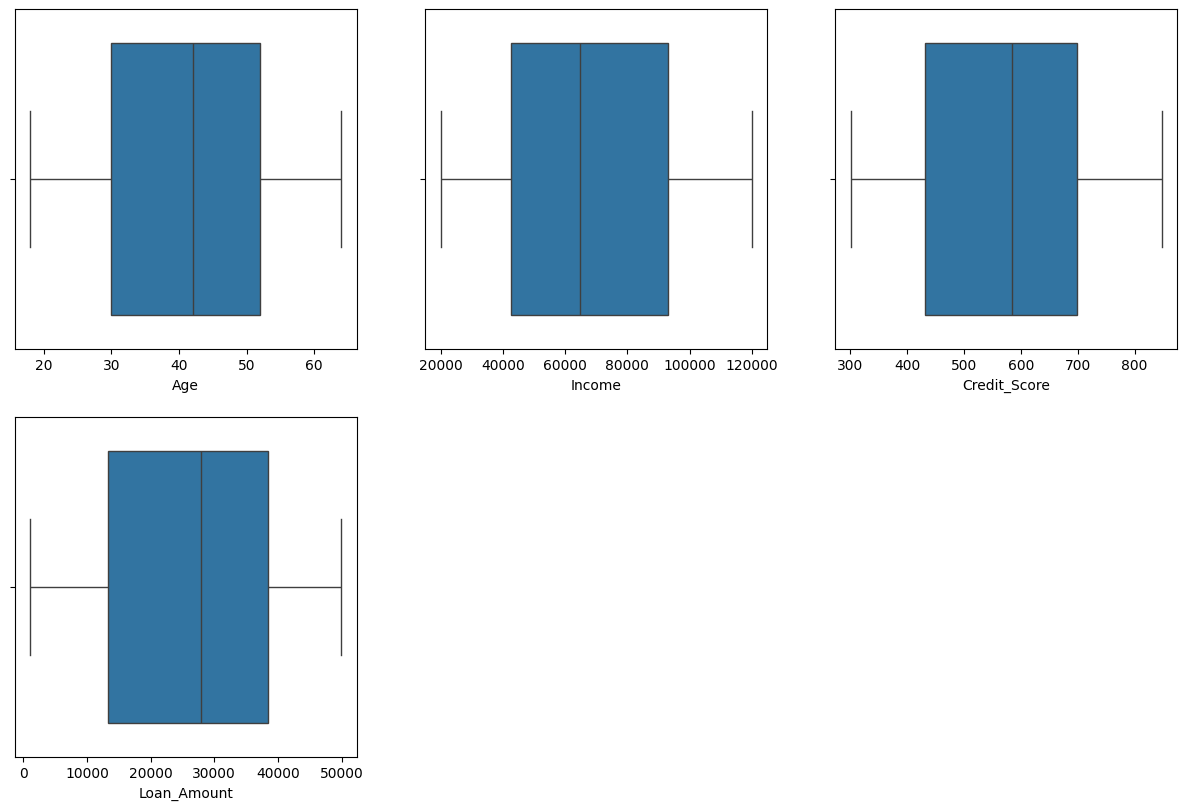

In [32]:
# Boxplot numerical columns
plt.figure(figsize=(15,15))
for i,col in zip(range(1,len(numerical)),df[numerical]) :
    plt.subplot(3,3,i)
    sns.boxplot(data = df , x=df[col])
plt.show()

## Encoding

In [36]:
# Numerical encoding untuk 'Education_Level'
education_mapping = {
    'High School': 0,
    'Bachelor': 1,
    'Master': 2,
    'PhD': 3
}
df['Education_Level'] = df['Education_Level'].map(education_mapping)


# Numerical encoding untuk 'Loan_Purpose'
loan_purpose_mapping = {
    'Personal': 0,
    'Home': 1,
    'Car': 2,
    'Medical': 3,
    'Education':4
}
df['Loan_Purpose'] = df['Loan_Purpose'].map(loan_purpose_mapping)


print(df.dtypes)
df.head()

Age                int64
Income             int64
Education_Level    int64
Credit_Score       int64
Loan_Amount        int64
Loan_Purpose       int64
Loan_Approval      int64
dtype: object


,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,56,24000,3,333,26892,0,0
1,46,90588,2,316,26619,1,1
2,32,113610,3,452,1281,0,1
3,60,117856,0,677,28420,0,0
4,25,58304,3,641,16360,2,0


## Spletting

In [37]:
X = df.drop(columns=['Loan_Approval'] , axis=1)
Y = df['Loan_Approval']

In [38]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(X,Y , test_size=0.2 , random_state=42)

## Scaling

In [39]:
scaler = StandardScaler()

In [40]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [41]:
xtrain = pd.DataFrame(xtrain, columns=X.columns)
xtest = pd.DataFrame(xtest, columns=X.columns)

<h3 style="background-color:#004D40; color:#FFC107; padding:10px; border-radius:8px; text-align:center;">
Data Modeling
</h3>


# Classification Model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
# define the Models
ClassificationModels = {
    'Logisitic Regression' : LogisticRegression() ,
    'Random Forest' : RandomForestClassifier() ,
    'Descion Tree': DecisionTreeClassifier() ,
    'SVC' : SVC() ,
    'XGBoost' : XGBClassifier() ,
    'Gradient Boosting' : GradientBoostingClassifier()
}

In [44]:
# Train the models
for name, model in ClassificationModels.items():
    model.fit(xtrain, ytrain)
    print(f"{name} model has been trained successfully!")

Logisitic Regression model has been trained successfully!
Random Forest model has been trained successfully!
Descion Tree model has been trained successfully!
SVC model has been trained successfully!
XGBoost model has been trained successfully!
Gradient Boosting model has been trained successfully!


In [45]:
# Evaluate the models
for name, model in ClassificationModels.items():
    modelPredictionForTrain = model.predict(xtrain)
    modelPredictionForTest = model.predict(xtest)
    print(name , " train Score by score Func = " , model.score(xtrain,ytrain))
    print(name , " test Score by score Func = " , model.score(xtest,ytest))
    print(name , " train Score by acc score Func = " , accuracy_score(ytrain,modelPredictionForTrain))
    print(name , " test Score by acc score Func = " , accuracy_score(ytest,modelPredictionForTest))
    print("Model Classification Report\n")
    print(classification_report(ytest,modelPredictionForTest))
    print("--------------------------------------------------------")

Logisitic Regression  train Score by score Func =  0.595
Logisitic Regression  test Score by score Func =  0.64
Logisitic Regression  train Score by acc score Func =  0.595
Logisitic Regression  test Score by acc score Func =  0.64
Model Classification Report

              precision    recall  f1-score   support

           0       0.67      0.05      0.10        37
           1       0.64      0.98      0.78        63

    accuracy                           0.64       100
   macro avg       0.65      0.52      0.44       100
weighted avg       0.65      0.64      0.53       100

--------------------------------------------------------
Random Forest  train Score by score Func =  1.0
Random Forest  test Score by score Func =  0.49
Random Forest  train Score by acc score Func =  1.0
Random Forest  test Score by acc score Func =  0.49
Model Classification Report

              precision    recall  f1-score   support

           0       0.31      0.30      0.30        37
           1     

In [46]:
results = []
# Train and evaluate the models
for name, model in ClassificationModels.items():
    model.fit(xtrain, ytrain)
    print(f"{name} model has been trained successfully!")

    modelPredictionForTrain = model.predict(xtrain)
    modelPredictionForTest = model.predict(xtest)

    # Append results to the list
    results.append([
        name,
        model.score(xtrain, ytrain),
        model.score(xtest, ytest),
        accuracy_score(ytrain, modelPredictionForTrain),
        accuracy_score(ytest, modelPredictionForTest)
    ])

results_df = pd.DataFrame(results, columns=[
    "Model",
    "Train Score (model.score)",
    "Test Score (model.score)",
    "Train Score (accuracy_score)",
    "Test Score (accuracy_score)"
])

display(results_df)

Logisitic Regression model has been trained successfully!
Random Forest model has been trained successfully!
Descion Tree model has been trained successfully!
SVC model has been trained successfully!
XGBoost model has been trained successfully!
Gradient Boosting model has been trained successfully!


,Model,Train Score (model.score),Test Score (model.score),Train Score (accuracy_score),Test Score (accuracy_score)
0,Logisitic Regression,0.5950,0.64,0.5950,0.64
1,Random Forest,1.0000,0.51,1.0000,0.51
2,Descion Tree,1.0000,0.52,1.0000,0.52
3,SVC,0.6175,0.62,0.6175,0.62
4,XGBoost,1.0000,0.52,1.0000,0.52
5,Gradient Boosting,0.9475,0.45,0.9475,0.45


dari hasil diatas dapat dilihat bahwa akurasi model logistik regresi dan SVM lebih tinggi, oleh karena itu saya menggunakan model logistik regresi dan SVM

           Feature  Importance
4      Loan_Amount    0.303052
1           Income    0.270628
3     Credit_Score    0.211525
0              Age    0.160213
5     Loan_Purpose    0.029380
2  Education_Level    0.025202


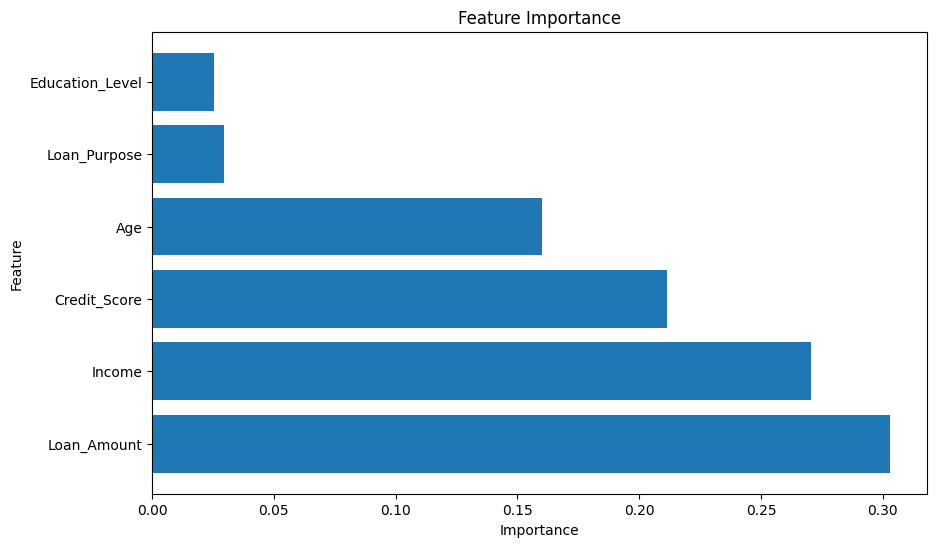

In [47]:
importance = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importance.head(20))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

fitur yang paling berpengaruh adalah Loan Amount, disusul Income dan Credit Score

# Hyperparameter Tunning

## Tuning Logistik Regresi

In [52]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tentukan _grid_ parameter untuk penalti l1
param_grid_logistic_l1 = {
    'penalty': ['l1'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Tentukan _grid_ parameter untuk penalti l2
param_grid_logistic_l2 = {
    'penalty': ['l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag']
}

# Gunakan StratifiedKFold untuk _cross-validation_
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Buat objek GridSearchCV untuk l1
grid_logistic_l1 = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_logistic_l1,
    refit=True,
    verbose=3,
    scoring='accuracy',
    cv=cv
)

# Buat objek GridSearchCV untuk l2
grid_logistic_l2 = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_logistic_l2,
    refit=True,
    verbose=3,
    scoring='accuracy',
    cv=cv
)

# _Fit_ kedua model
grid_logistic_l1.fit(xtrain, ytrain)
grid_logistic_l2.fit(xtrain, ytrain)

# Cetak parameter terbaik untuk masing-masing model
print("Parameter Terbaik untuk Logistic Regression (l1):", grid_logistic_l1.best_params_)
print("Parameter Terbaik untuk Logistic Regression (l2):", grid_logistic_l2.best_params_)

# Bandingkan hasil dan pilih model terbaik
if grid_logistic_l1.best_score_ > grid_logistic_l2.best_score_:
    best_model = grid_logistic_l1.best_estimator_
else:
    best_model = grid_logistic_l2.best_estimator_

# Lakukan prediksi menggunakan model terbaik
logistic_predictions = best_model.predict(xtest)

# Evaluasi model terbaik
print("\nLogistic Regression Terbaik:")
print("Akurasi:", accuracy_score(ytest, logistic_predictions))
print(classification_report(ytest, logistic_predictions))
print("Confusion Matrix:\n", confusion_matrix(ytest, logistic_predictions))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.412 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.412 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.412 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.412 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.412 total time=   0.0s
[CV 1/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.588 total time=   0.0s
[CV 2/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.588 total time=   0.0s
[CV 3/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.588 total time=   0.0s
[CV 4/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.588 total time=   0.0s
[CV 5/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.588 total time=   0.0s
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.412 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


didapatkan hasil akurasi tunning yang kurang baik dibandingkan dengan akurasi model biasa, sehingga tunning tidak cocok untuk model logistik regresi pada data ini

## Tuning SVM

In [53]:
# SVM with Hyperparameter Tuning
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

grid.fit(xtrain, ytrain)

# Print best parameters
print("Best Parameters:", grid.best_params_)

svm_predictions = grid.predict(xtest)

print("\nTuned SVM:")
print("Accuracy:", accuracy_score(ytest, svm_predictions))
print(classification_report(ytest, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(ytest, svm_predictions))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.588 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.588 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.588 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.588 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.588 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Akurasi Tunning SVM cenderung lebih baik dikarenakan akurasinya masih mengalami peningkatan walaupun tidak signifikan. Perlu diingat bahwa semua model tidak menghasilkan precission, recall, dan f1 score dengan baik sehingga data perlu dilakukan penyeimbangan data

## Corelation Matrix

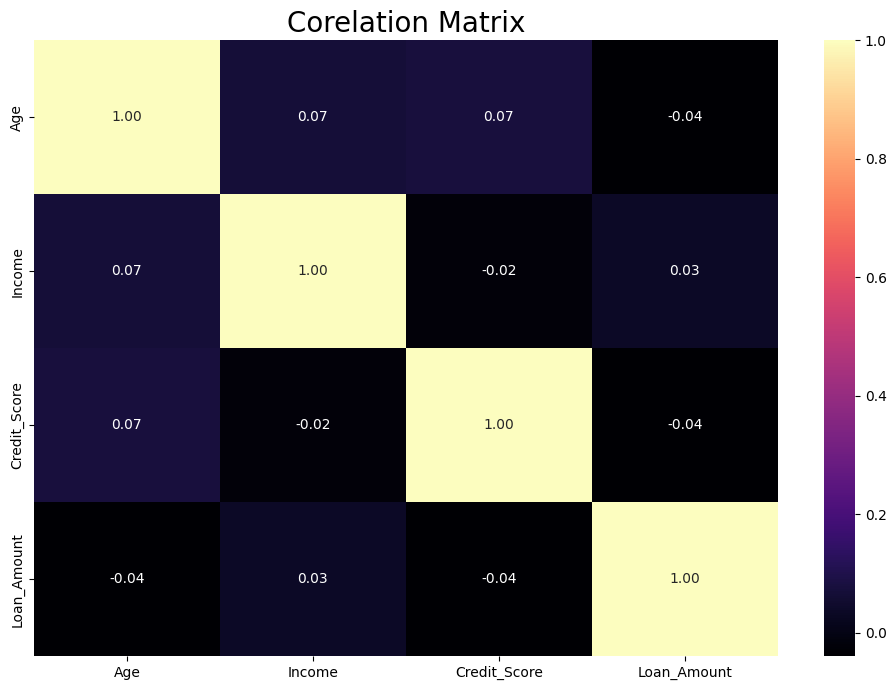

In [54]:
f, ax = plt.subplots(figsize=[12,8])
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', ax=ax, cmap='magma')
ax.set_title('Corelation Matrix', fontsize=20)
plt.show()

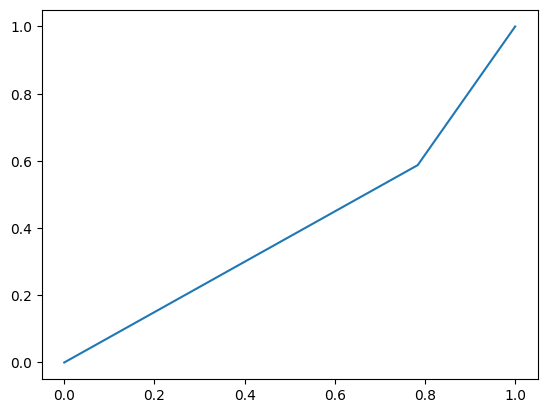

In [55]:
def generate_auc_roc_curve(model, xtest, ytest):
    from sklearn.metrics import roc_curve, roc_auc_score

    y_pred_proba = model.predict(xtest)

    y_pred_proba = y_pred_proba.ravel()

    fpr, tpr, thresholds = roc_curve(ytest,  y_pred_proba)
    auc = roc_auc_score(ytest, y_pred_proba)
    plt.plot(fpr,tpr)
    plt.show()
    pass
generate_auc_roc_curve(model, xtest, ytest)

In [56]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict(xtest)
auc = roc_auc_score(ytest, y_pred_proba)
print("AUC ROC Curve with Area Under the curve = %.3f"%auc)

AUC ROC Curve with Area Under the curve = 0.402


In [57]:
df['Loan_Approval'].value_counts()

,count
Loan_Approval,
1,298
0,202


dapat dilihat memang data tidak seimbang, sehingga data dapat diseimbangkan dengan menggunakan metode random oversampling

# Resampling

## Random Oversampling

In [58]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn

In [59]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_resampled, y_train_resampled = oversampler.fit_resample(xtrain, ytrain)

X_train_over = X_train_resampled
y_train_over = y_train_resampled
X_test_over = xtest
y_test_over = ytest
y_train_over.value_counts()

,count
Loan_Approval,
0,235
1,235


data telah seimbang sehingga kita dapat melakukan pemodelan ulang

In [60]:
# Train the models
for name, model in ClassificationModels.items():
    model.fit(X_train_over, y_train_over)  # Menggunakan data oversampling untuk training
    print(f"{name} model has been trained successfully!")

# Evaluate the models
for name, model in ClassificationModels.items():
    modelPredictionForTrain = model.predict(X_train_over)  # Menggunakan data oversampling untuk evaluasi training
    modelPredictionForTest = model.predict(X_test_over)  # Menggunakan data testing original
    print(name, " train Score by score Func = ", model.score(X_train_over, y_train_over))
    print(name, " test Score by score Func = ", model.score(X_test_over, y_test_over))
    print(name, " train Score by acc score Func = ", accuracy_score(y_train_over, modelPredictionForTrain))
    print(name, " test Score by acc score Func = ", accuracy_score(y_test_over, modelPredictionForTest))
    print("Model Classification Report\n")
    print(classification_report(y_test_over, modelPredictionForTest))
    print("--------------------------------------------------------")

Logisitic Regression model has been trained successfully!
Random Forest model has been trained successfully!
Descion Tree model has been trained successfully!
SVC model has been trained successfully!
XGBoost model has been trained successfully!
Gradient Boosting model has been trained successfully!
Logisitic Regression  train Score by score Func =  0.574468085106383
Logisitic Regression  test Score by score Func =  0.45
Logisitic Regression  train Score by acc score Func =  0.574468085106383
Logisitic Regression  test Score by acc score Func =  0.45
Model Classification Report

              precision    recall  f1-score   support

           0       0.33      0.49      0.40        37
           1       0.59      0.43      0.50        63

    accuracy                           0.45       100
   macro avg       0.46      0.46      0.45       100
weighted avg       0.49      0.45      0.46       100

--------------------------------------------------------
Random Forest  train Score by s

In [61]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

# Train and evaluate the models
for name, model in ClassificationModels.items():
    model.fit(X_train_over, y_train_over)  # Menggunakan data oversampling untuk training
    print(f"{name} model has been trained successfully!")

    y_pred_train = model.predict(X_train_over)  # Prediksi pada data training
    y_pred_test = model.predict(X_test_over)  # Prediksi pada data testing

    # Calculate metrics
    accuracy_train = accuracy_score(y_train_over, y_pred_train)
    accuracy_test = accuracy_score(y_test_over, y_pred_test)
    precision_test = precision_score(y_test_over, y_pred_test)
    recall_test = recall_score(y_test_over, y_pred_test)
    f1_test = f1_score(y_test_over, y_pred_test)


    # Append results to the list
    results.append([
        name,
        accuracy_train,  # Accuracy on training data
        accuracy_test,  # Accuracy on testing data
        precision_test,  # Precision on testing data
        recall_test,  # Recall on testing data
        f1_test  # F1-score on testing data
    ])

# Create DataFrame
results_df = pd.DataFrame(results, columns=[
    "Model",
    "Train Accuracy",
    "Test Accuracy",
    "Precision",
    "Recall",
    "F1-Score"
])

display(results_df)

Logisitic Regression model has been trained successfully!
Random Forest model has been trained successfully!
Descion Tree model has been trained successfully!
SVC model has been trained successfully!
XGBoost model has been trained successfully!
Gradient Boosting model has been trained successfully!


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
0,Logisitic Regression,0.574468,0.45,0.586957,0.428571,0.495413
1,Random Forest,1.000000,0.44,0.561404,0.507937,0.533333
2,Descion Tree,1.000000,0.47,0.580645,0.571429,0.576000
3,SVC,0.682979,0.46,0.591837,0.460317,0.517857
4,XGBoost,1.000000,0.50,0.610169,0.571429,0.590164
5,Gradient Boosting,0.946809,0.46,0.588235,0.476190,0.526316


Analisis:

* Akurasi: XGBoost memiliki akurasi pengujian tertinggi (0.50), diikuti oleh Decision Tree (0.47).
* Presisi: XGBoost memiliki presisi tertinggi (0.610169), yang berarti bahwa ketika model memprediksi kelas positif, prediksi tersebut benar.
* Recall: Decision Tree memiliki recall tertinggi (0.571429), yang berarti bahwa model mampu mengidentifikasi sebagian besar kasus positif yang sebenarnya.
* F1-Score: XGBoost memiliki F1-Score tertinggi (0.590164), yang merupakan ukuran keseimbangan antara presisi dan recall.

# Tunning Resampling

## Tunning Logistik Regresi

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_logistic = GridSearchCV(LogisticRegression(max_iter=1000),
                            param_grid_logistic,
                            refit=True,
                            verbose=3,
                            scoring='f1_weighted')

grid_logistic.fit(X_train_over, y_train_over)

print("Best Parameters for Logistic Regression:", grid_logistic.best_params_)


logistic_predictions = grid_logistic.predict(X_test_over)

print("\nTuned Logistic Regression:")
print("Accuracy:", accuracy_score(y_test_over, logistic_predictions))
print(classification_report(y_test_over, logistic_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test_over, logistic_predictions))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.333 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.333 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.333 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.333 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.333 total time=   0.0s
[CV 1/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.333 total time=   0.0s
[CV 2/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.333 total time=   0.0s
[CV 3/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.333 total time=   0.0s
[CV 4/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.333 total time=   0.0s
[CV 5/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.333 total time=   0.0s
[CV 1/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.561 total time=   0.0s
[CV 2/5] END C=0.001, penalty

## Tuning SVM

In [63]:
from sklearn.model_selection import GridSearchCV # Import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

grid.fit(X_train_over, y_train_over)

print("Best Parameters:", grid.best_params_)

svm_predictions = grid.predict(X_test_over)

print("\nTuned SVM:")
print("Accuracy:", accuracy_score(y_test_over, svm_predictions))
print(classification_report(y_test_over, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test_over, svm_predictions))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.574 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.809 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.564 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.511 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.574 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.543 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.596 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

In [64]:
# tunning hyperparameter to improve model's performance
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(xtrain, ytrain)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

## Tunning Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
best_params = grid_search.best_params_
model = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    random_state=42
)

model.fit(xtrain, ytrain)

y_pred = model.predict(xtest)
print("Accuracy after Hyperparameter Tuning:", accuracy_score(ytest, y_pred))
# 7. Evaluasi performa model terbaik
print("Gradient Boosting (Tuned):")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))

Accuracy after Hyperparameter Tuning: 0.6
Gradient Boosting (Tuned):
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.62      0.95      0.75        63

    accuracy                           0.60       100
   macro avg       0.31      0.48      0.38       100
weighted avg       0.39      0.60      0.47       100

Confusion Matrix:
 [[ 0 37]
 [ 3 60]]


## Tunning Random Forest

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Hyperparameter Terbaik: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Evaluasi Model:
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.30      0.27      0.29        37
           1       0.60      0.63      0.62        63

    accuracy                           0.50       100
   macro avg       0.45      0.45      0.45       100
weighted avg       0.49      0.50      0.49       100



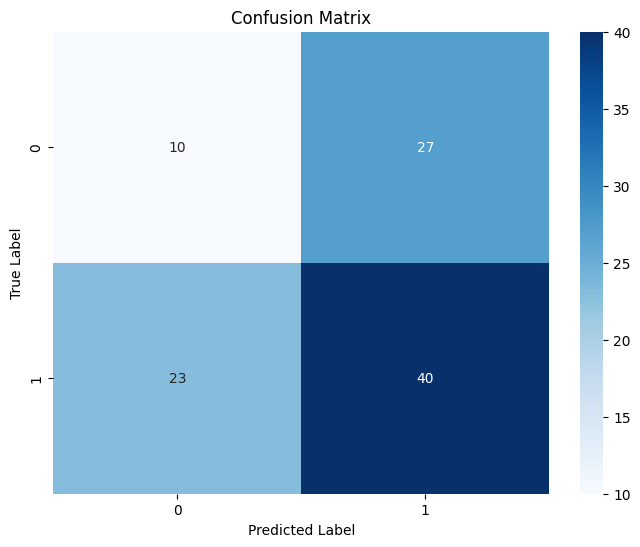

In [66]:
# Definisikan grid parameter untuk hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Latih model dengan GridSearchCV menggunakan data training yang telah di-resample
grid_search.fit(xtrain, ytrain)

# Dapatkan model terbaik dan hyperparameter terbaik
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Tampilkan hyperparameter terbaik
print("Hyperparameter Terbaik:", best_params)

# Prediksi pada data testing menggunakan model terbaik
y_pred = best_rf_model.predict(xtest)

# Evaluasi performa model
print("\nEvaluasi Model:")
print("Accuracy:", accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))

# Visualisasi Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Analisis dan Perbandingan:

* Akurasi: Gradient Boosting memiliki akurasi tertinggi (0.60), diikuti oleh SVM (0.53), dan Logistic Regression (0.46).
* Presisi: Logistic Regression dan SVM memiliki presisi yang relatif sama (sekitar 0.60), sedangkan Gradient Boosting sedikit lebih rendah (0.62). Presisi menunjukkan seberapa akurat model dalam memprediksi kelas positif.
* Recall: Gradient Boosting memiliki recall tertinggi (0.95), yang berarti model ini sangat baik dalam mengidentifikasi kasus positif yang sebenarnya. SVM memiliki recall yang cukup baik (0.68), sedangkan Logistic Regression memiliki recall terendah (0.41).
* F1-score: Gradient Boosting memiliki F1-score tertinggi (0.75), yang menunjukkan keseimbangan yang baik antara presisi dan recall. SVM memiliki F1-score yang cukup baik (0.65), sedangkan Logistic Regression memiliki F1-score terendah (0.49).
* Confusion Matrix: Confusion matrix menunjukkan bahwa Gradient Boosting cenderung memprediksi sebagian besar data sebagai kelas 1 (Loan Approval = 1). Hal ini mungkin karena data yang tidak seimbang, di mana kelas 1 lebih banyak daripada kelas 0. \

Kesimpulan:

Berdasarkan hasil evaluasi, Gradient Boosting (Tuned) tampaknya menjadi model terbaik setelah proses tuning dalam kasus ini. Terutama Gradient Boosting yang unggul dalam recall dan F1-score.

# Kesimpulan
1. Model logistik Regresi dan SVM memiliki hasil akurasi yang paling baik diantara semua model, namun pada saat dilakukan tunning model LR tidak mengalami perubahan, namun model SVM mengalami peningkatan akurasi. Walaupun hasilnya cukup baik namun data tersebut overfitting sehingga perlu dilakukan penyeimbangan data.

2. Hasil dari penyeimbangan data dengan random over sampling, dapat dilihat akurasi mengalami penurunan namun presicion, recall, dan f1 score mengalami kenaikan walaupun pada confusion matrics masih mengalami banyak kesalahan.

3. Hasil penyeimbangan data menunjukan bahwa  random forest dan Xgboost merupakan model yang paling baik. setelah dilakukan tunning, yang terbaik adalah gradient boosting dan SVM. SVM dikarenakan akurasi tunning menunjukkan yang paling tinggi. Sedangkan gradient boosting menunjukan bahwa precision, rcall, dan f1score lebih baik sehingga lebih mampu menebak data

4. Hasil penyeimbangan antara model dan tunning menunjukkan bahwa tunning mampu meningkatkan peforma diantara SVM san GB sedangkan pada LR dan Random Forest tunning tidak meningkatkan peforma

  Tuning dengan resampling dapat meningkatkan performa model dalam hal presisi, recall, dan F1-score, terutama untuk kelas minoritas. Namun, tuning juga dapat menurunkan akurasi model secara keseluruhan   

Gradient Boosting (Tuned) adalah model yang paling baik secara keseluruhan setelah tuning, terutama dalam hal recall dan F1-score. SVM (Tuned) juga merupakan model yang baik.